# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [2]:
url=r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

### Step 3. Assign it to a variable titanic 

In [3]:
titanic=pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [4]:
titanic=titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Step 5. Create a pie chart presenting the male/female proportion

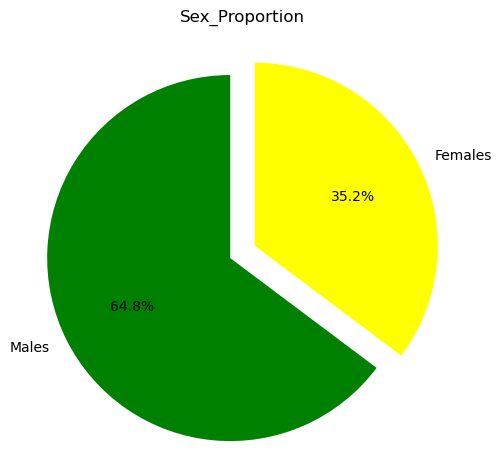

In [42]:
#sum the instances of male and female
males=(titanic['Sex']=='male').sum()
females=(titanic['Sex']=='female').sum()

#put them into a list called proportions
proportions=[males,females]

#create a piechart
plt.pie(
        #using proportions
        proportions,
        
        #with the labels being sex names
        labels=['Males','Females'],
    
        #with no shadows
        shadow=False,
    
        #with colors
        colors=['green','yellow'],
    
        #with one side exploded out
        explode=(0.15,0),
    
        #with the start angle at 90 deg
        startangle=90,
    
        #with the percent listed as fraction
        autopct='%1.1f%%'
)

#view the plot dropped above
plt.axis('square')

#setlabels
plt.title('Sex_Proportion')

#view the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5.0, 85.0)

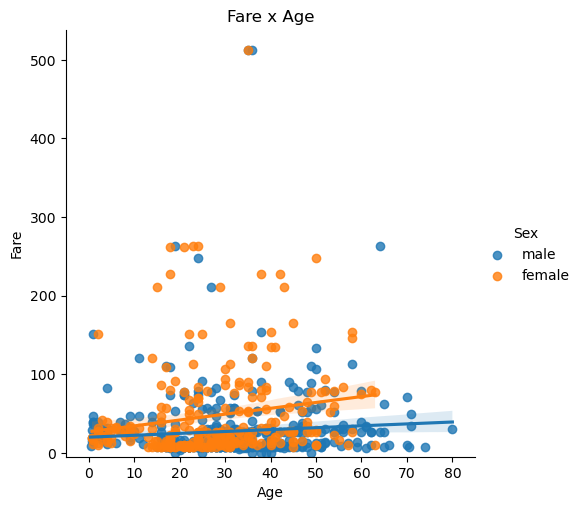

In [61]:
#create the plot using lmplot=linear map plot
lm=sns.lmplot(x='Age',y='Fare',hue='Sex',data=titanic,fit_reg=True)

#set title
lm.set(title='Fare x Age')

#get the axis object and tweak it
axes=lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)


### Step 7. How many people survived?

In [64]:
titanic.groupby(['Survived'])['Survived'].sum()

Survived
0      0
1    342
Name: Survived, dtype: int64

In [81]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 8. Create a histogram with the Fare payed

<Axes: xlabel='Fare', ylabel='Count'>

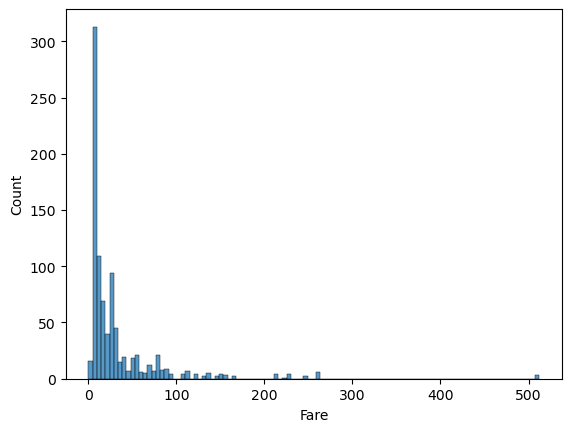

In [82]:
sns.histplot(titanic,x='Fare')

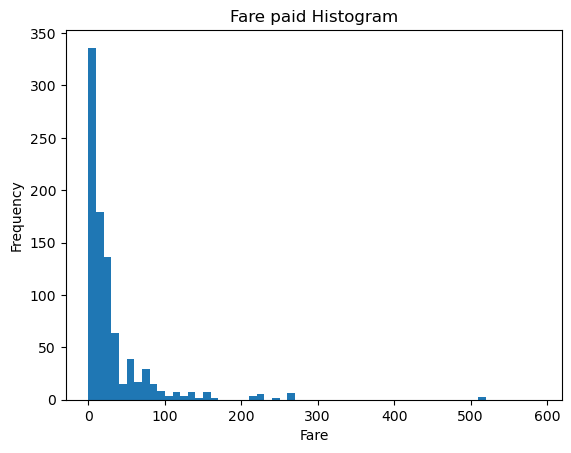

In [84]:
#sort the values from top to the least
df=titanic['Fare'].sort_values(ascending=False)

#create bins intervals using numpy
binsval=np.arange(0,600,10)

#create the plot
plt.hist(df,bins=binsval)

#set the titles and the labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title("Fare paid Histogram")
plt.show()

### BONUS: Create your own question and answer it.

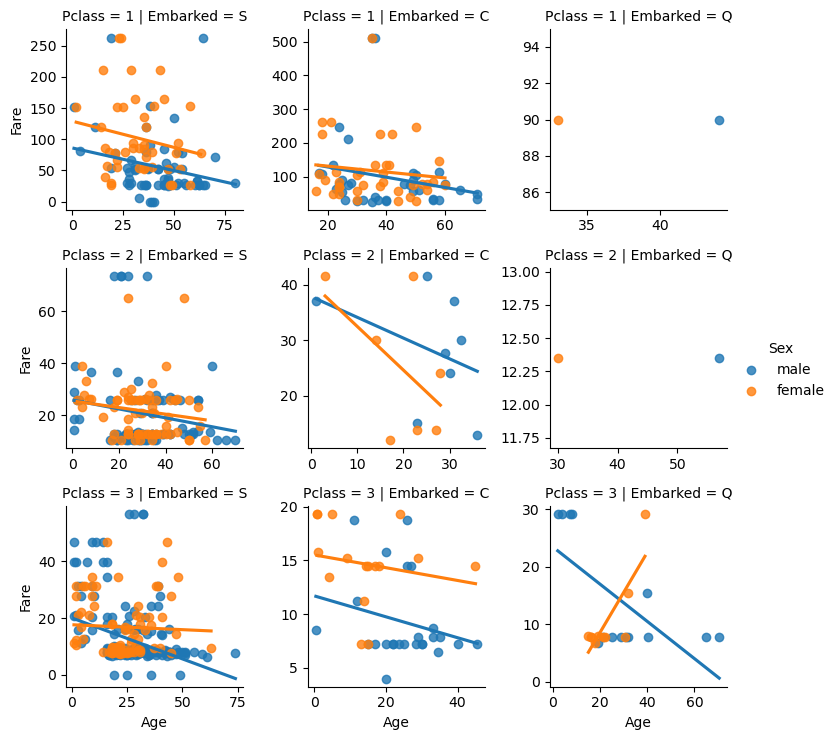

In [80]:
sns.lmplot(x='Age',y='Fare',data=titanic,hue='Sex',fit_reg=True,col='Embarked',height=2.5,row='Pclass',
           sharey=False,sharex=False,ci=0)

In [92]:
titanic.dtypes

Survived      int64
Pclass       object
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [91]:
titanic['Pclass']=titanic['Pclass'].astype('object')

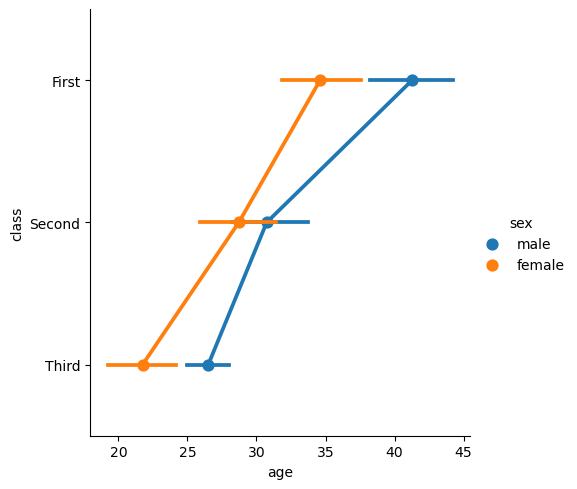

In [108]:
df=sns.load_dataset('titanic')
sns.catplot(data=df,x="age",y='class',kind='point',hue='sex')

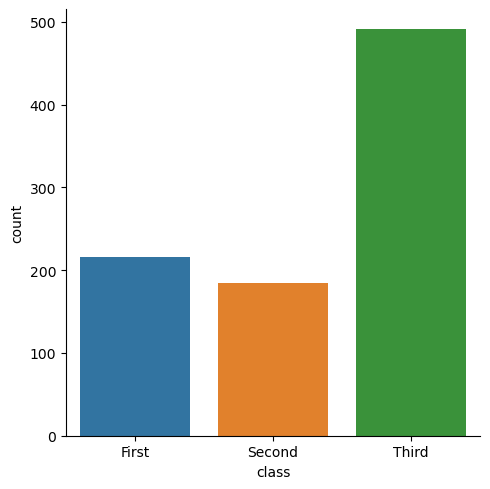

In [105]:
sns.catplot(data=df,x='class',kind='count')

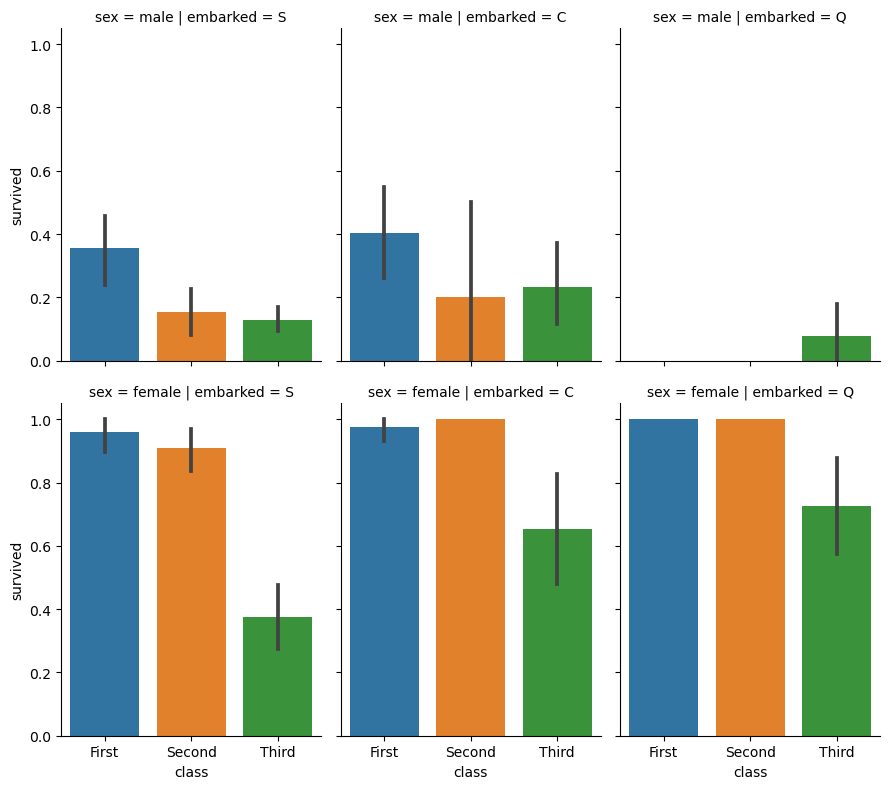

In [120]:
sns.catplot(
            data=df,x='class',y='survived',col='embarked',row='sex',
            kind='bar',height=4,aspect=0.75
            
)


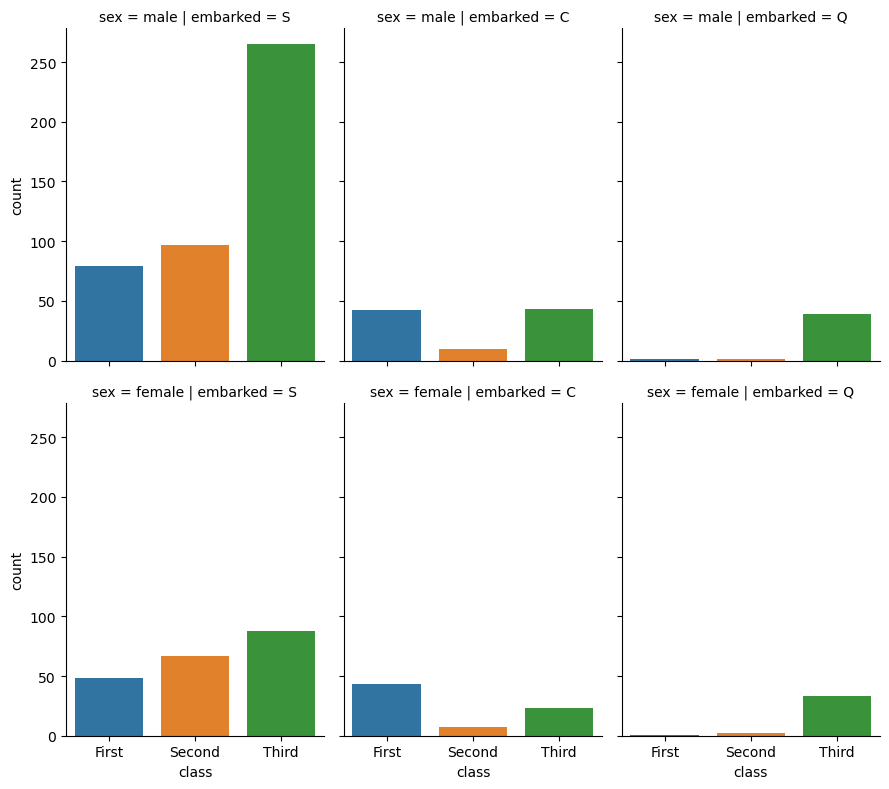

In [121]:
sns.catplot(
            data=df,x='class',col='embarked',row='sex',
            kind='count',height=4,aspect=0.75
            
)


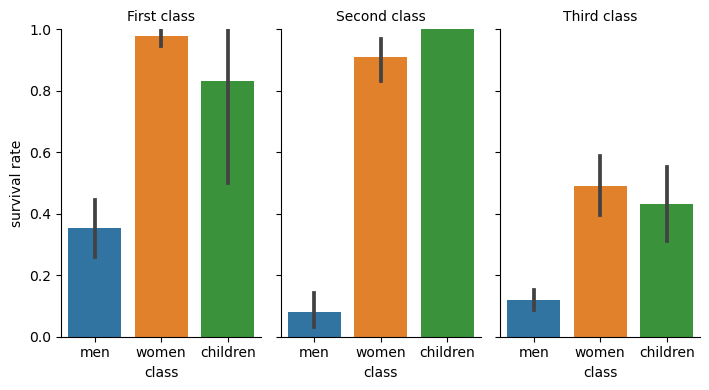

In [134]:
g=sns.catplot(
                data=df,x='who',y='survived',col='class',
                kind='bar',height=4,aspect=0.6,
)
g.set_axis_labels('class','survival rate')
g.set_xticklabels(['men','women','children'])
g.set_titles('{col_name} {col_var}')
g.set(ylim=(0,1))
#g.despine(left=True)